In [4]:
# Import necessary libraries
import yfinance as yf
import yoptions as yo
import optionlab as ol

import pandas as pd
import numpy as np

import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define the time period
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime.now()  # This will set the end date to today's date

# Ensure to use the date component only if necessary
end = end.date()  # Converts datetime object to a date object, removing time component if not needed

## Macro Data (nemployment rates, inflation rates (CPI), and interest rates)

In [6]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt

def fetch_data(series_id, start_date, end_date):
    """
    Fetches economic data from FRED.
    
    Args:
    series_id (str): The FRED series ID.
    start_date (datetime): Start date for data retrieval.
    end_date (datetime): End date for data retrieval.
    
    Returns:
    pandas.DataFrame: The requested data.
    """
    return pdr.get_data_fred(series_id, start_date, end_date)

def plot_data(data, title):
    """
    Plots the provided data.
    
    Args:
    data (pandas.DataFrame): Data to plot.
    title (str): Title for the plot.
    """
    data.plot(title=title, figsize=(10, 5))
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

def plot_group(indicators, group_title, nrows, ncols):
    """
    Plots a group of indicators in a grid layout.
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 7))
    fig.suptitle(group_title, fontsize=16)
    fig.tight_layout(pad=5.0, rect=[0, 0.03, 1, 0.95])  # Adjust the rect to fit the suptitle

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Fetch and plot data in a grid
    for idx, (series_id, description) in enumerate(indicators.items()):
        data = fetch_data(series_id, start, end)
        axes[idx].plot(data.index, data, label=description)
        axes[idx].set_title(description)
        axes[idx].grid(True)
        axes[idx].legend()

    plt.show()
    
# Special section for yield curves
def plot_yield_curves(start_date, end_date):
    """
    Plots yield curves at different intervals.

    Args:
    start_date (datetime): Start date for data retrieval.
    end_date (datetime): End date for data retrieval.
    """
    yield_curves = {
        'DGS1MO': '1-Month Treasury Constant Maturity Rate',
        'DGS1': '1-Year Treasury Constant Maturity Rate',
        'DGS2': '2-Year Treasury Constant Maturity Rate',
        'DGS5': '5-Year Treasury Constant Maturity Rate',
        'DGS10': '10-Year Treasury Constant Maturity Rate',
        'DGS30': '30-Year Treasury Constant Maturity Rate'
    }
    plt.figure(figsize=(12, 8))
    plt.title('Yield Curves')
    plt.xlabel('Date')
    plt.ylabel('Yield (%)')
    
    for series_id, label in yield_curves.items():
        data = fetch_data(series_id, start_date, end_date)
        plt.plot(data.index, data, label=label)
    
    plt.legend()
    plt.grid(True)
    plt.show()

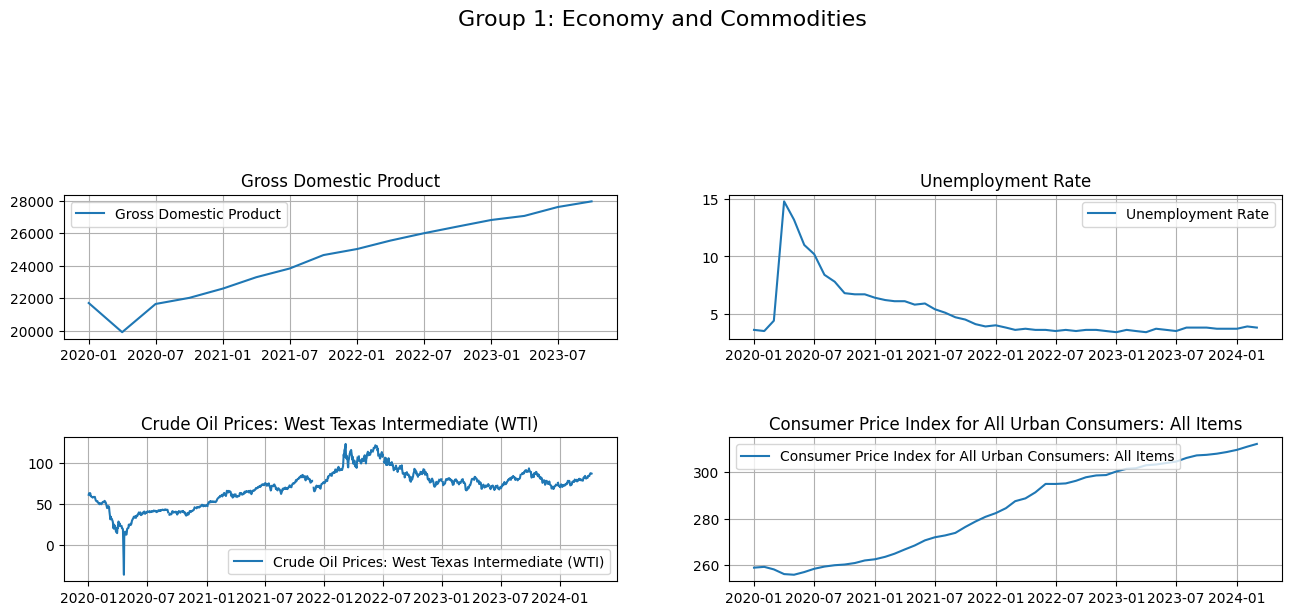

In [7]:
# Group 1: Economic indicators related to overall economy and commodities
group1_indicators = {
    'GDP': 'Gross Domestic Product',
    'UNRATE': 'Unemployment Rate',
    'DCOILWTICO': 'Crude Oil Prices: West Texas Intermediate (WTI)',
    'CPIAUCSL': 'Consumer Price Index for All Urban Consumers: All Items'
}
# Plot each group
plot_group(group1_indicators, "Group 1: Economy and Commodities", nrows=2, ncols=2)

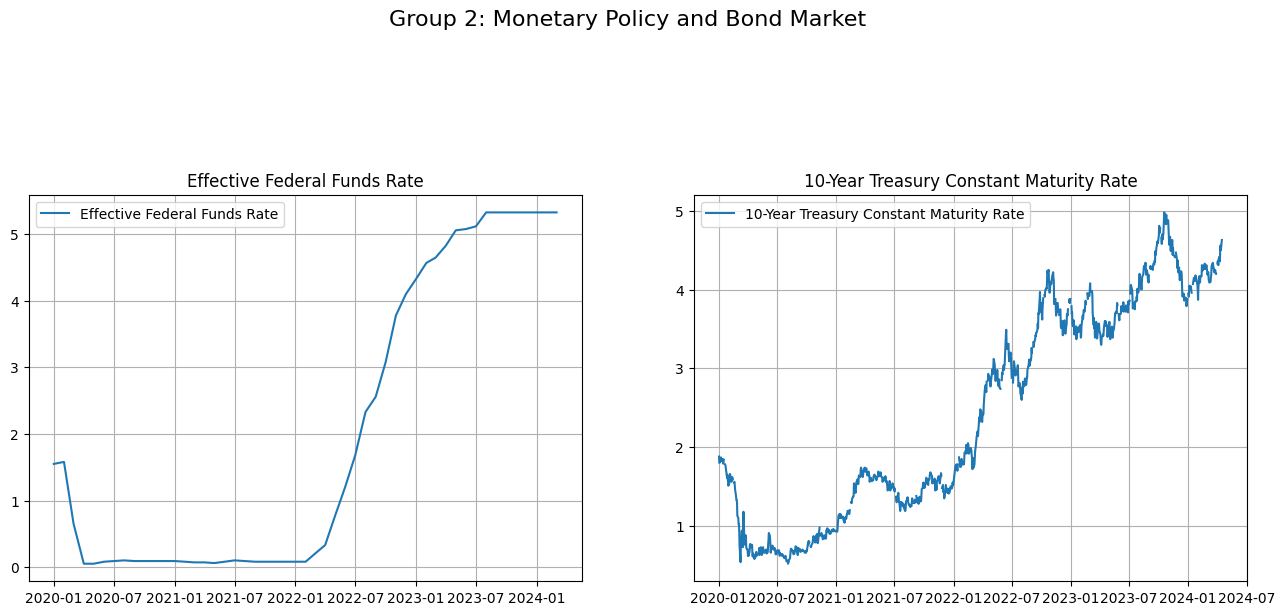

In [8]:
# Group 2: Economic indicators related to monetary policy and bond market
group2_indicators = {
    'FEDFUNDS': 'Effective Federal Funds Rate',
    'DGS10': '10-Year Treasury Constant Maturity Rate'
}

plot_group(group2_indicators, "Group 2: Monetary Policy and Bond Market", nrows=1, ncols=2)

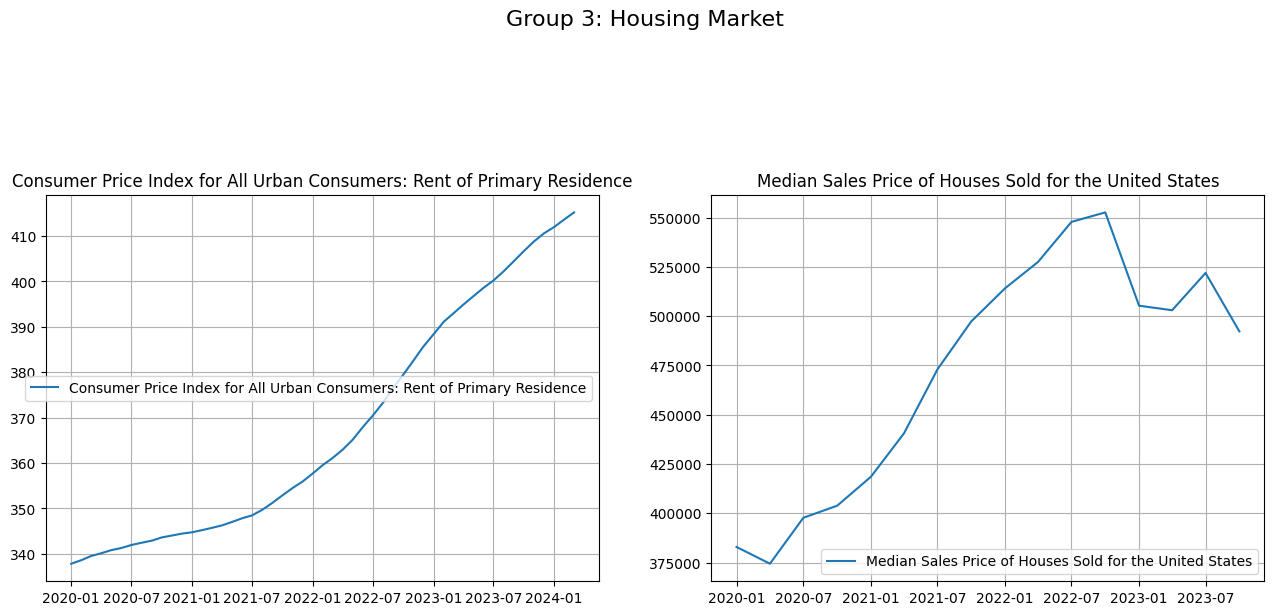

In [9]:
# Group 3: Economic indicators related to the housing market
group3_indicators = {
    'CUUR0000SEHA': 'Consumer Price Index for All Urban Consumers: Rent of Primary Residence',
    'ASPUS': 'Median Sales Price of Houses Sold for the United States'
}
plot_group(group3_indicators, "Group 3: Housing Market", nrows=1, ncols=2)

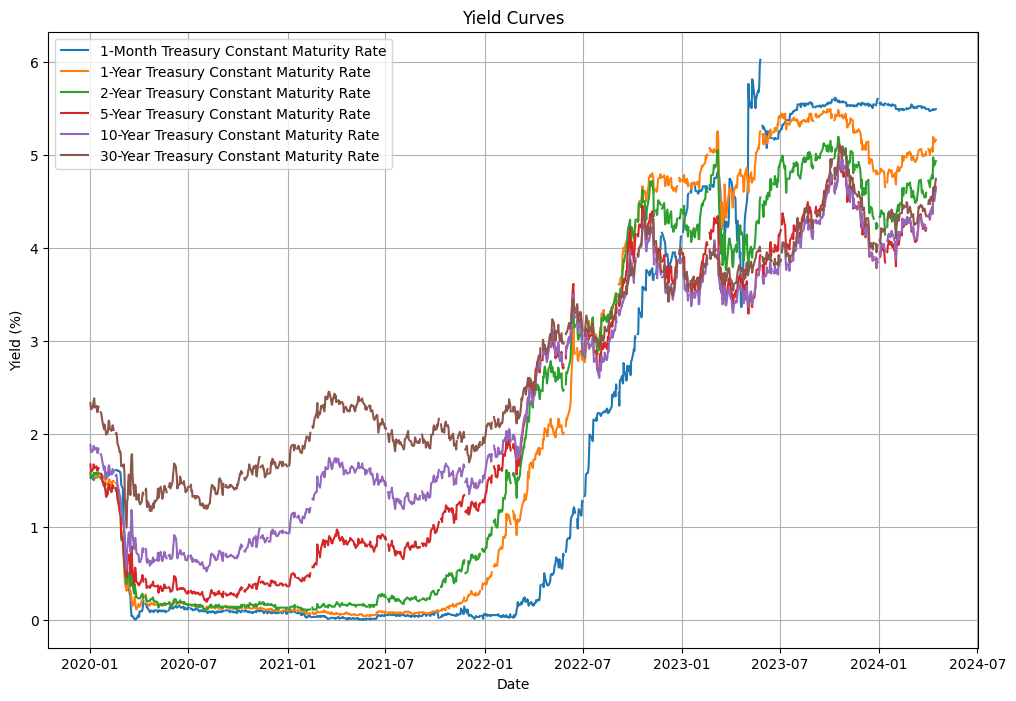

In [10]:
# Display yield curves
plot_yield_curves(start, end)